## Sanat's Workshop Tour 2019 - Kaggle comp

Premise:

Santa has 5k people visiting his workshop over 100 days. <br>
They have submitted preferred dates for visitation. <br>
They cannot all be given their preffered dates. <br>
Santa incurs a cost for each family that doesn't get their preferred dates. <br>

Minimise the financial cost to Santa of this administrative fuck up. 

In [38]:
import pandas as pd
from pylab import *

In [3]:
df = pd.read_csv('family_data.csv')

In [6]:
df.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4


In [59]:
def preference_cost(choice_number, n_people):
    # Make sure choice_number is valid    
    if choice_number < 0 or choice_number > 9:
        choice_number = -1

    # depending on the choice number, get a different penalty
    if choice_number == 0:
        return 0
    if choice_number == 1:
        return 50
    if choice_number == 2:
        return 50 + (n_people*9)
    if choice_number == 3:
        return 100 + (n_people*9)
    if choice_number == 4:
        return 200 + (n_people*9)
    if choice_number == 5:
        return 200 + (n_people*18)
    if choice_number == 6:
        return 300 + (n_people*18)
    if choice_number == 7:
        return 300 + (n_people*36)
    if choice_number == 8:
        return 400 + (n_people*36)
    if choice_number == 9:
        return 500 + (n_people*(199 + 36))
    if choice_number == -1:
        return 500 + (n_people*(398 + 36))

In [51]:
# Flex the list comprehension
choices = [i for i in range(0,11)]
n_peoples = list(df.n_people.unique())

every_combination = [(choice, n) for choice in choices for n in n_peoples]

In [60]:
every_combination = pd.DataFrame(every_combination, columns=['choice', 'n_peeps'])
every_combination['Preference_Cost'] = every_combination.apply(lambda row: preference_cost(row['choice'], row['n_peeps']), axis=1) 

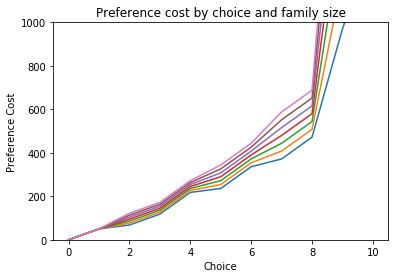

In [72]:
n_2 = every_combination[every_combination.n_peeps == 2]
n_3 = every_combination[every_combination.n_peeps == 3]
n_4 = every_combination[every_combination.n_peeps == 4]
n_5 = every_combination[every_combination.n_peeps == 5]
n_6 = every_combination[every_combination.n_peeps == 6]
n_7 = every_combination[every_combination.n_peeps == 7]
n_8 = every_combination[every_combination.n_peeps == 8]

plot(n_2.choice, n_2.Preference_Cost)
plot(n_3.choice, n_3.Preference_Cost)
plot(n_4.choice, n_4.Preference_Cost)
plot(n_5.choice, n_5.Preference_Cost)
plot(n_6.choice, n_6.Preference_Cost)
plot(n_7.choice, n_7.Preference_Cost)
plot(n_8.choice, n_8.Preference_Cost)

ylim(0,1000)
xlabel('Choice')
ylabel('Preference Cost')
title('Preference cost by choice and family size')
show()

In [58]:
n_2

,choice,n_peeps,Preference_Cost
2,0,2,0
9,1,2,1
16,2,2,2
23,3,2,3
30,4,2,4
37,5,2,5
44,6,2,6
51,7,2,7
58,8,2,8
65,9,2,9


In [69]:
n_2 = every_combination[every_combination.n_peeps == 2 and every_combination.choice < 8]
n_3 = every_combination[every_combination.n_peeps == 3 and every_combination.choice < 8]
n_4 = every_combination[every_combination.n_peeps == 4 and every_combination.choice < 8]
n_5 = every_combination[every_combination.n_peeps == 5 and every_combination.choice < 8]
n_6 = every_combination[every_combination.n_peeps == 6 and every_combination.choice < 8]
n_7 = every_combination[every_combination.n_peeps == 7 and every_combination.choice < 8]
n_8 = every_combination[every_combination.n_peeps == 8 and every_combination.choice < 8]

plot(n_2.choice, n_2.Preference_Cost)
plot(n_3.choice, n_3.Preference_Cost)
plot(n_4.choice, n_4.Preference_Cost)
plot(n_5.choice, n_5.Preference_Cost)
plot(n_6.choice, n_6.Preference_Cost)
plot(n_7.choice, n_7.Preference_Cost)
plot(n_8.choice, n_8.Preference_Cost)


xlabel('Choice')
ylabel('Preference Cost')
title('Preference cost by choice and family size')
show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().